In [2]:
with open("sorted_dates.txt", 'r', encoding="utf8") as f:
    artists_dict = eval(f.readline())

In [3]:
artists_dict


{'AC/DC\n': {2012: 2, 2013: 1, 2014: 2, 2015: 4, 2016: 1},
 'Aerosmith\n': {2014: 8, 2015: 1},
 'Al Green\n': {2014: 4, 2015: 1},
 'Aretha Franklin\n': {2012: 1, 2014: 6, 2015: 6},
 'Black Sabbath\n': {2012: 2, 2014: 1, 2015: 4},
 'Bo Diddley\n': {2012: 2, 2014: 19, 2015: 1},
 'Bob Dylan\n': {2012: 2, 2013: 12, 2014: 14, 2015: 3, 2016: 2},
 'Bob Marley\n': {2013: 6, 2014: 3, 2015: 2, 2016: 1},
 'Bruce Springsteen\n': {2012: 4, 2013: 11, 2014: 18, 2015: 14, 2016: 3},
 'Buddy Holly\n': {2014: 2},
 'Carl Perkins\n': {2015: 1},
 'Carlos Santana\n': {2012: 1, 2013: 3, 2014: 3, 2015: 7},
 'Chuck Berry\n': {2012: 1, 2014: 5},
 'Cream\n': {2012: 3, 2013: 1, 2014: 2},
 'Curtis Mayfield\n': {2014: 1},
 'David Bowie\n': {2012: 6, 2013: 18, 2014: 28, 2015: 9, 2016: 16},
 'Elton John\n': {2012: 6, 2013: 9, 2014: 7},
 'Elvis Costello\n': {2012: 3, 2014: 1},
 'Elvis Presley\n': {2012: 3, 2014: 7, 2015: 7, 2016: 4},
 'Eminem\n': {2012: 3, 2013: 14, 2014: 5, 2015: 9},
 'Eric Clapton\n': {2012: 3, 2013:

In [4]:
total = {}
for artist_name, years_dict in artists_dict.items():
    total[artist_name] = 0
#     if 2016 not in years_dict.keys():
#         years_dict[2016] = 0
    for popularity in years_dict.values():
        total[artist_name] += popularity
        

In [24]:
top = sorted([(value, key) for key, value in total.items()], reverse=True)[:14]

In [25]:
top

[(124, 'Prince\n'),
 (102, 'The Beatles\n'),
 (100, 'U2\n'),
 (77, 'David Bowie\n'),
 (72, 'Rolling Stones\n'),
 (60, 'Nirvana\n'),
 (50, 'Radiohead\n'),
 (50, 'Bruce Springsteen\n'),
 (36, 'Led Zeppelin\n'),
 (33, 'The Who\n'),
 (33, 'Bob Dylan\n'),
 (31, 'Eminem\n'),
 (28, 'Phil Spector\n'),
 (26, 'Madonna\n')]

In [26]:
top_artists = [name for year, name in top]
years, popularity = list(artists_dict[top_artists[0]].keys()), list(artists_dict[top_artists[0]].values())
years, popularity


([2016, 2012, 2013, 2014, 2015], [14, 8, 33, 39, 30])

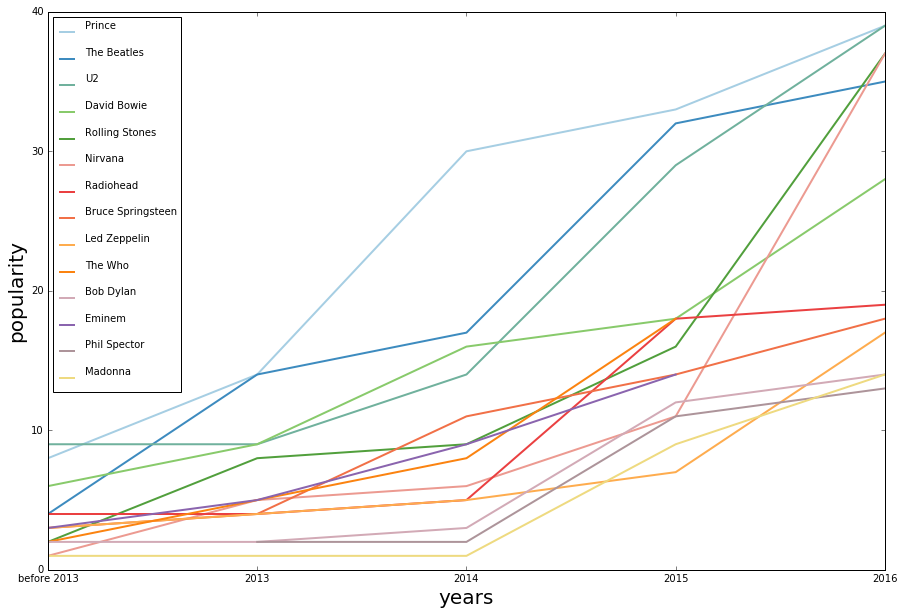

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

plt.figure(figsize=(15, 10))

for i, artist in enumerate(top_artists):
    years, popularity = sorted(artists_dict[artist].keys()), sorted(artists_dict[artist].values())
    c = cm.Paired(i/14.,1)
    plt.plot(years, popularity, color=c, label=artist, linewidth=2)
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    plt.locator_params(nbins=4)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('years', fontsize=20)
    plt.ylabel('popularity', fontsize=20)
    plt.legend(loc='best', fontsize=10)
    
    axes = plt.gca()
    axes.set_xticklabels(['before 2013'] + [int(x) for x in axes.get_xticks().tolist()[1:]])